# Finding the normal pitch angle threshold

In [ ]:
"""Finding the normal pitch angle threshold

"""

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [ ]:
# import data
df = pd.read_csv('data/SCADA_merged.csv', skip_blank_lines=True)

In [ ]:
# list of turbines to plot
# plot these three turbines to visualise the difference
list1 = [1, 8, 25]

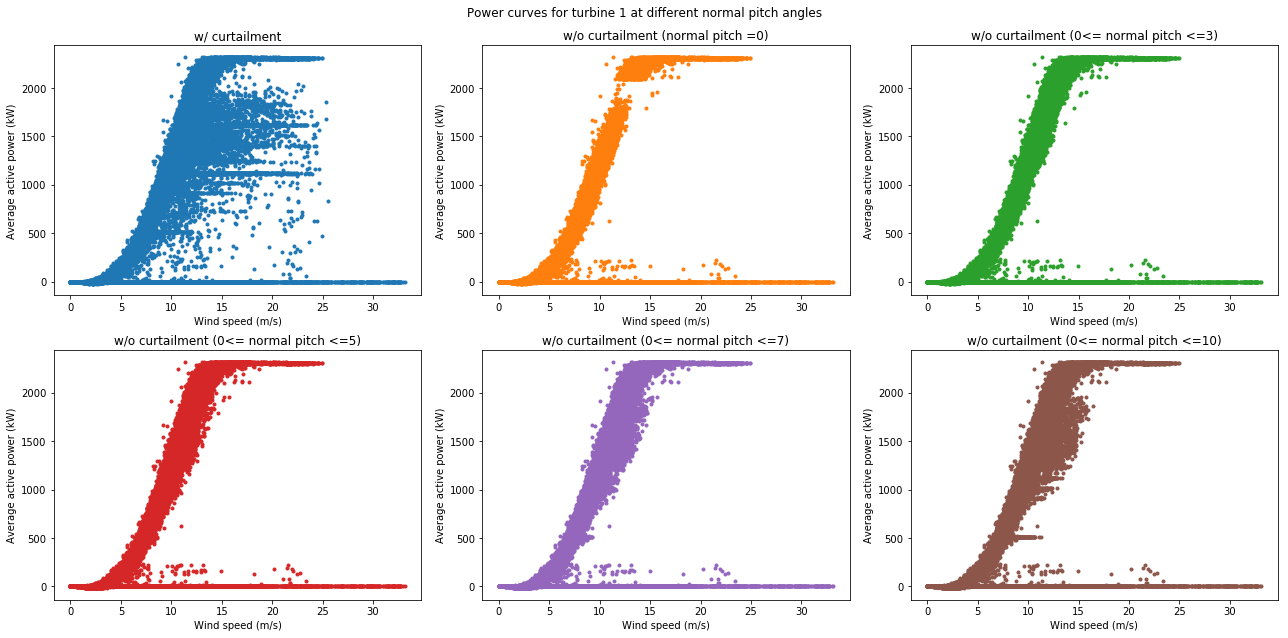

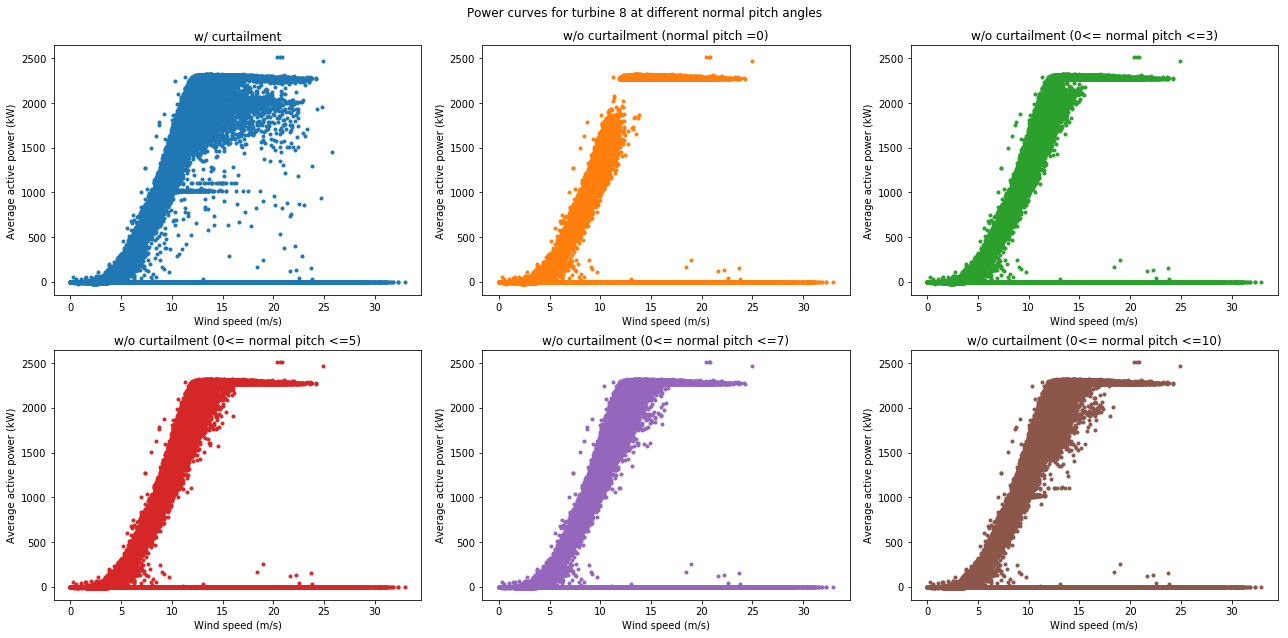

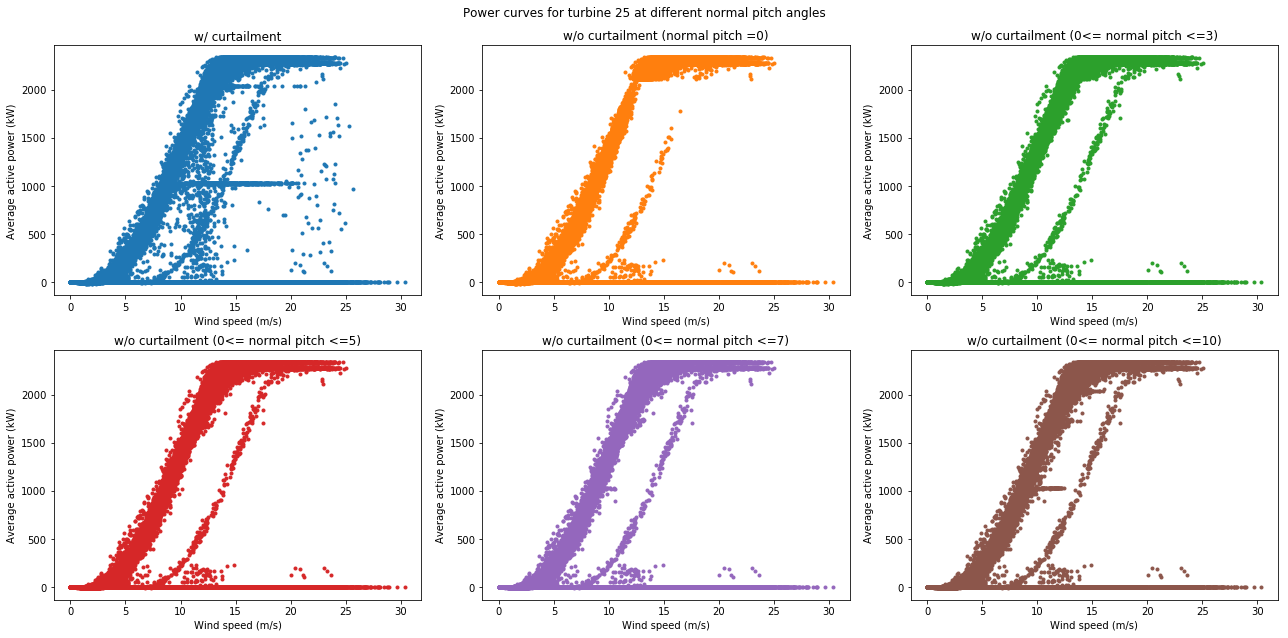

In [1]:
# plot for pitch angle = 0, 3, 5, 7 and 10 deg
for x in list1:
    # filter only data for turbine x
    dfx = df[(df['turbine'] == x)].copy()

    # filter out curtailment - curtailed when turbine is pitching
    # above (and/or below) a certain threshold
    # 0 deg - normal pitch
    def f0(c):
        if c['pitch'] == 0 or (
                c['pitch'] != 0 and (
                c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment0'] = dfx.apply(f0, axis=1)

    # 3 deg
    def f1(c):
        if 0 <= c['pitch'] <= 3 or (
                (c['pitch'] > 3 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment1'] = dfx.apply(f1, axis=1)

    # 5 deg
    def f2(c):
        if 0 <= c['pitch'] <= 5 or (
                (c['pitch'] > 5 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment2'] = dfx.apply(f2, axis=1)

    # 7 deg
    def f3(c):
        if 0 <= c['pitch'] <= 7 or (
                (c['pitch'] > 7 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment3'] = dfx.apply(f3, axis=1)

    # 10 deg
    def f4(c):
        if 0 <= c['pitch'] <= 10 or (
                (c['pitch'] > 10 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment4'] = dfx.apply(f4, axis=1)

    # filter data for plots
    # normal w/o curtailment 0 deg
    df1 = dfx[dfx.curtailment0 == 'normal']
    # normal w/o curtailment 3 deg
    df2 = dfx[dfx.curtailment1 == 'normal']
    # normal w/o curtailment 5 deg
    df3 = dfx[dfx.curtailment2 == 'normal']
    # normal w/o curtailment 7 deg
    df4 = dfx[dfx.curtailment3 == 'normal']
    # normal w/o curtailment 10 deg
    df5 = dfx[dfx.curtailment4 == 'normal']

    # get x and y coordinates
    # normal w/ curtailment
    x1 = dfx['ws_av']
    y1 = dfx['ap_av']
    # normal w/o curtailment 0 deg pitch
    x2 = df1['ws_av']
    y2 = df1['ap_av']
    # normal w/o curtailment 3 deg
    x3 = df2['ws_av']
    y3 = df2['ap_av']
    # normal w/o curtailment 5 deg
    x4 = df3['ws_av']
    y4 = df3['ap_av']
    # normal w/o curtailment 7 deg
    x5 = df4['ws_av']
    y5 = df4['ap_av']
    # normal w/o curtailment 10 deg
    x6 = df5['ws_av']
    y6 = df5['ap_av']

    # plot the figure
    fig = plt.figure(figsize=(18, 9), dpi=1500)

    ax1 = fig.add_subplot(231)
    ax1.scatter(x1, y1, marker='.', c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/ curtailment')

    ax2 = fig.add_subplot(232)
    ax2.scatter(x2, y2, marker='.', c='C1')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (normal pitch =0)')

    ax3 = fig.add_subplot(233)
    ax3.scatter(x3, y3, marker='.', c='C2')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=3)')

    ax4 = fig.add_subplot(234)
    ax4.scatter(x4, y4, marker='.', c='C3')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=5)')

    ax5 = fig.add_subplot(235)
    ax5.scatter(x5, y5, marker='.', c='C4')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=7)')

    ax6 = fig.add_subplot(236)
    ax6.scatter(x6, y6, marker='.', c='C5')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=10)')

    fig.suptitle(
        'Power curves for turbine %s' % x +
        ' at different normal pitch angles')
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

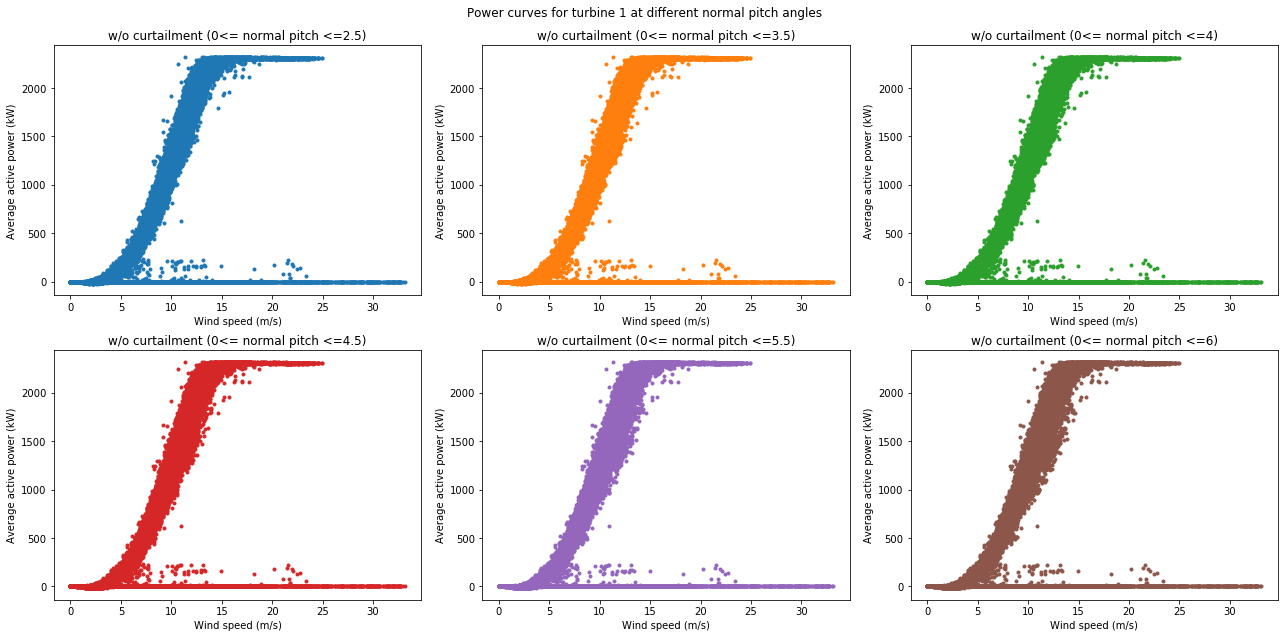

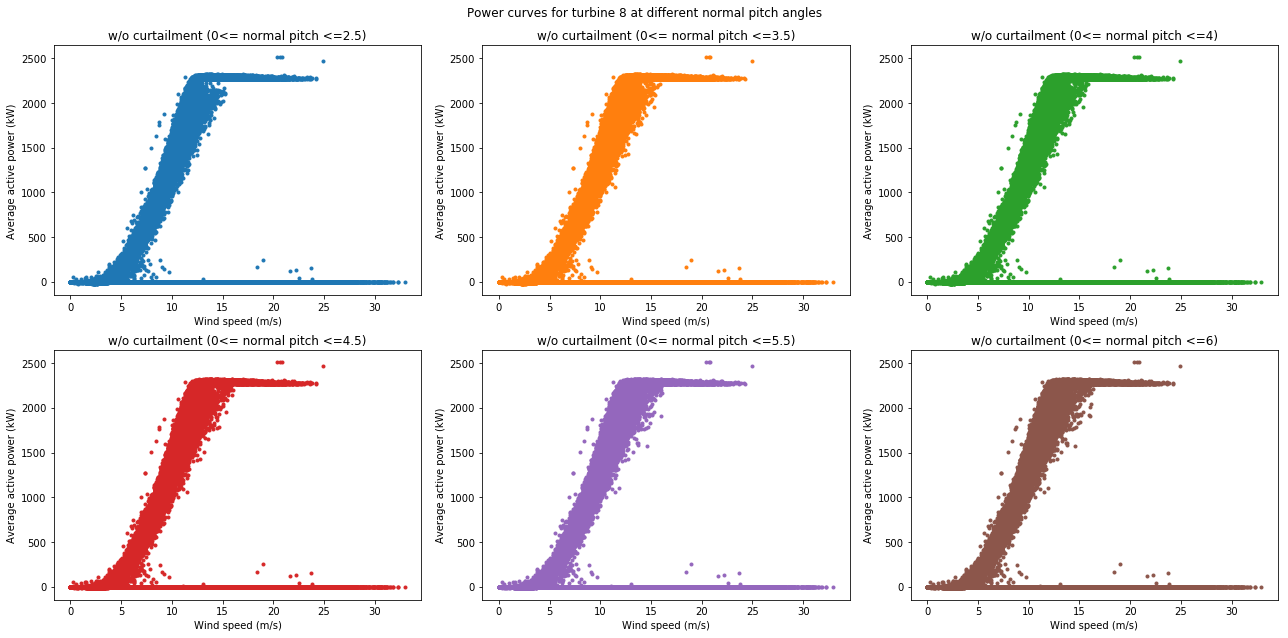

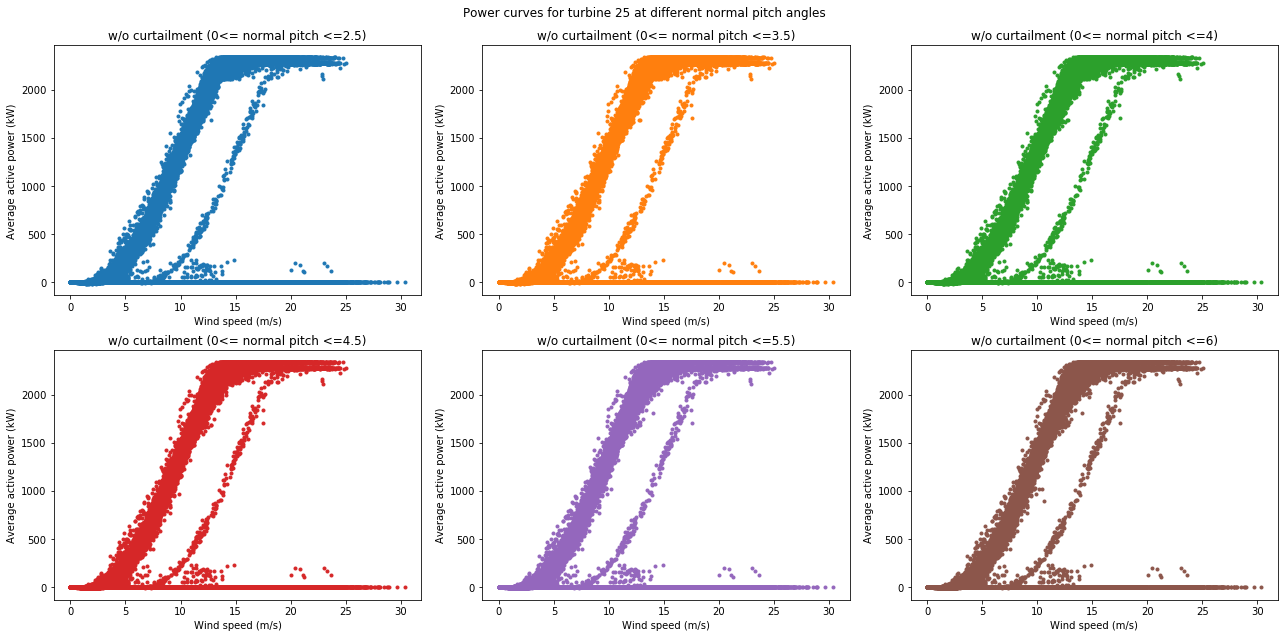

In [2]:
# plot for pitch angle = 2.5, 3.5, 4, 4.5, 5.5 and 6 deg
for x in list1:
    dfx = df[(df['turbine'] == x)].copy()

    # 2.5 deg
    def f5(c):
        if 0 <= c['pitch'] <= 2.5 or (
                (c['pitch'] > 2.5 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment5'] = dfx.apply(f5, axis=1)

    # 3.5 deg
    def f6(c):
        if 0 <= c['pitch'] <= 3.5 or (
                (c['pitch'] > 3.5 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment6'] = dfx.apply(f6, axis=1)

    # 4 deg
    def f7(c):
        if 0 <= c['pitch'] <= 4 or (
                (c['pitch'] > 4 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment7'] = dfx.apply(f7, axis=1)

    # 4.5 deg
    def f8(c):
        if 0 <= c['pitch'] <= 4.5 or (
                (c['pitch'] > 4.5 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment8'] = dfx.apply(f8, axis=1)

    # 5.5 deg
    def f9(c):
        if 0 <= c['pitch'] <= 5.5 or (
                (c['pitch'] > 5.5 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment9'] = dfx.apply(f9, axis=1)

    # 6 deg
    def f10(c):
        if 0 <= c['pitch'] <= 6 or (
                (c['pitch'] > 6 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return 'normal'
        else:
            return 'curtailed'
    dfx['curtailment10'] = dfx.apply(f10, axis=1)

    # normal w/o curtailment 2.5 deg
    df1 = dfx[dfx.curtailment5 == 'normal']
    # normal w/o curtailment 3.5 deg
    df2 = dfx[dfx.curtailment6 == 'normal']
    # normal w/o curtailment 4 deg
    df3 = dfx[dfx.curtailment7 == 'normal']
    # normal w/o curtailment 4.5 deg
    df4 = dfx[dfx.curtailment8 == 'normal']
    # normal w/o curtailment 5.5 deg
    df5 = dfx[dfx.curtailment9 == 'normal']
    # normal w/o curtailment 6 deg
    df6 = dfx[dfx.curtailment10 == 'normal']

    # normal w/o curtailment 2.5 deg pitch
    x1 = df1['ws_av']
    y1 = df1['ap_av']
    # normal w/o curtailment 3.5 deg
    x2 = df2['ws_av']
    y2 = df2['ap_av']
    # normal w/o curtailment 4 deg
    x3 = df3['ws_av']
    y3 = df3['ap_av']
    # normal w/o curtailment 4.5 deg
    x4 = df4['ws_av']
    y4 = df4['ap_av']
    # normal w/o curtailment 5.5 deg
    x5 = df5['ws_av']
    y5 = df5['ap_av']
    # normal w/o curtailment 6 deg
    x6 = df6['ws_av']
    y6 = df6['ap_av']

    fig = plt.figure(figsize=(18, 9), dpi=1500)

    ax1 = fig.add_subplot(231)
    ax1.scatter(x1, y1, marker='.', c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=2.5)')

    ax2 = fig.add_subplot(232)
    ax2.scatter(x2, y2, marker='.', c='C1')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=3.5)')

    ax3 = fig.add_subplot(233)
    ax3.scatter(x3, y3, marker='.', c='C2')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=4)')

    ax4 = fig.add_subplot(234)
    ax4.scatter(x4, y4, marker='.', c='C3')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=4.5)')

    ax5 = fig.add_subplot(235)
    ax5.scatter(x5, y5, marker='.', c='C4')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=5.5)')

    ax6 = fig.add_subplot(236)
    ax6.scatter(x6, y6, marker='.', c='C5')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=6)')

    fig.suptitle(
        'Power curves for turbine %s' % x +
        ' at different normal pitch angles')
    plt.tight_layout()
    plt.subplots_adjust(top=.92)
    plt.show()

In [ ]:
# plot for all turbines with a threshold of 3.5 deg
# list of turbines to plot
list2 = list(df['turbine'].unique())
# sort turbines in ascending order
list2 = sorted(list2, key=int)

In [ ]:
# create new empty dataframe with the same index
df2 = pd.DataFrame(index=df.index)

In [ ]:
# apply function for filtering curtailment
for x in list2:
    dfx = df[(df['turbine'] == x)].copy()

    # 3.5 deg
    def f(c):
        if 0 <= c['pitch'] <= 3.5 or (
                (c['pitch'] > 3.5 or c['pitch'] < 0) and (
                    c['ap_av'] <= (.1 * dfx['ap_av'].max()) or
                    c['ap_av'] >= (.9 * dfx['ap_av'].max()))):
            return c['ap_av']
    df2['%s' % x] = dfx.apply(f, axis=1)

In [ ]:
# copy wind speed from original dataframe
df2['Wind speed (m/s)'] = df['ws_av']
# setting wind speed as index
df2 = df2.set_index('Wind speed (m/s)')

In [ ]:
# create new list for individual subplot titles
list3 = [
    'Power curve for turbine %s without curtailment' % x for x in list2]

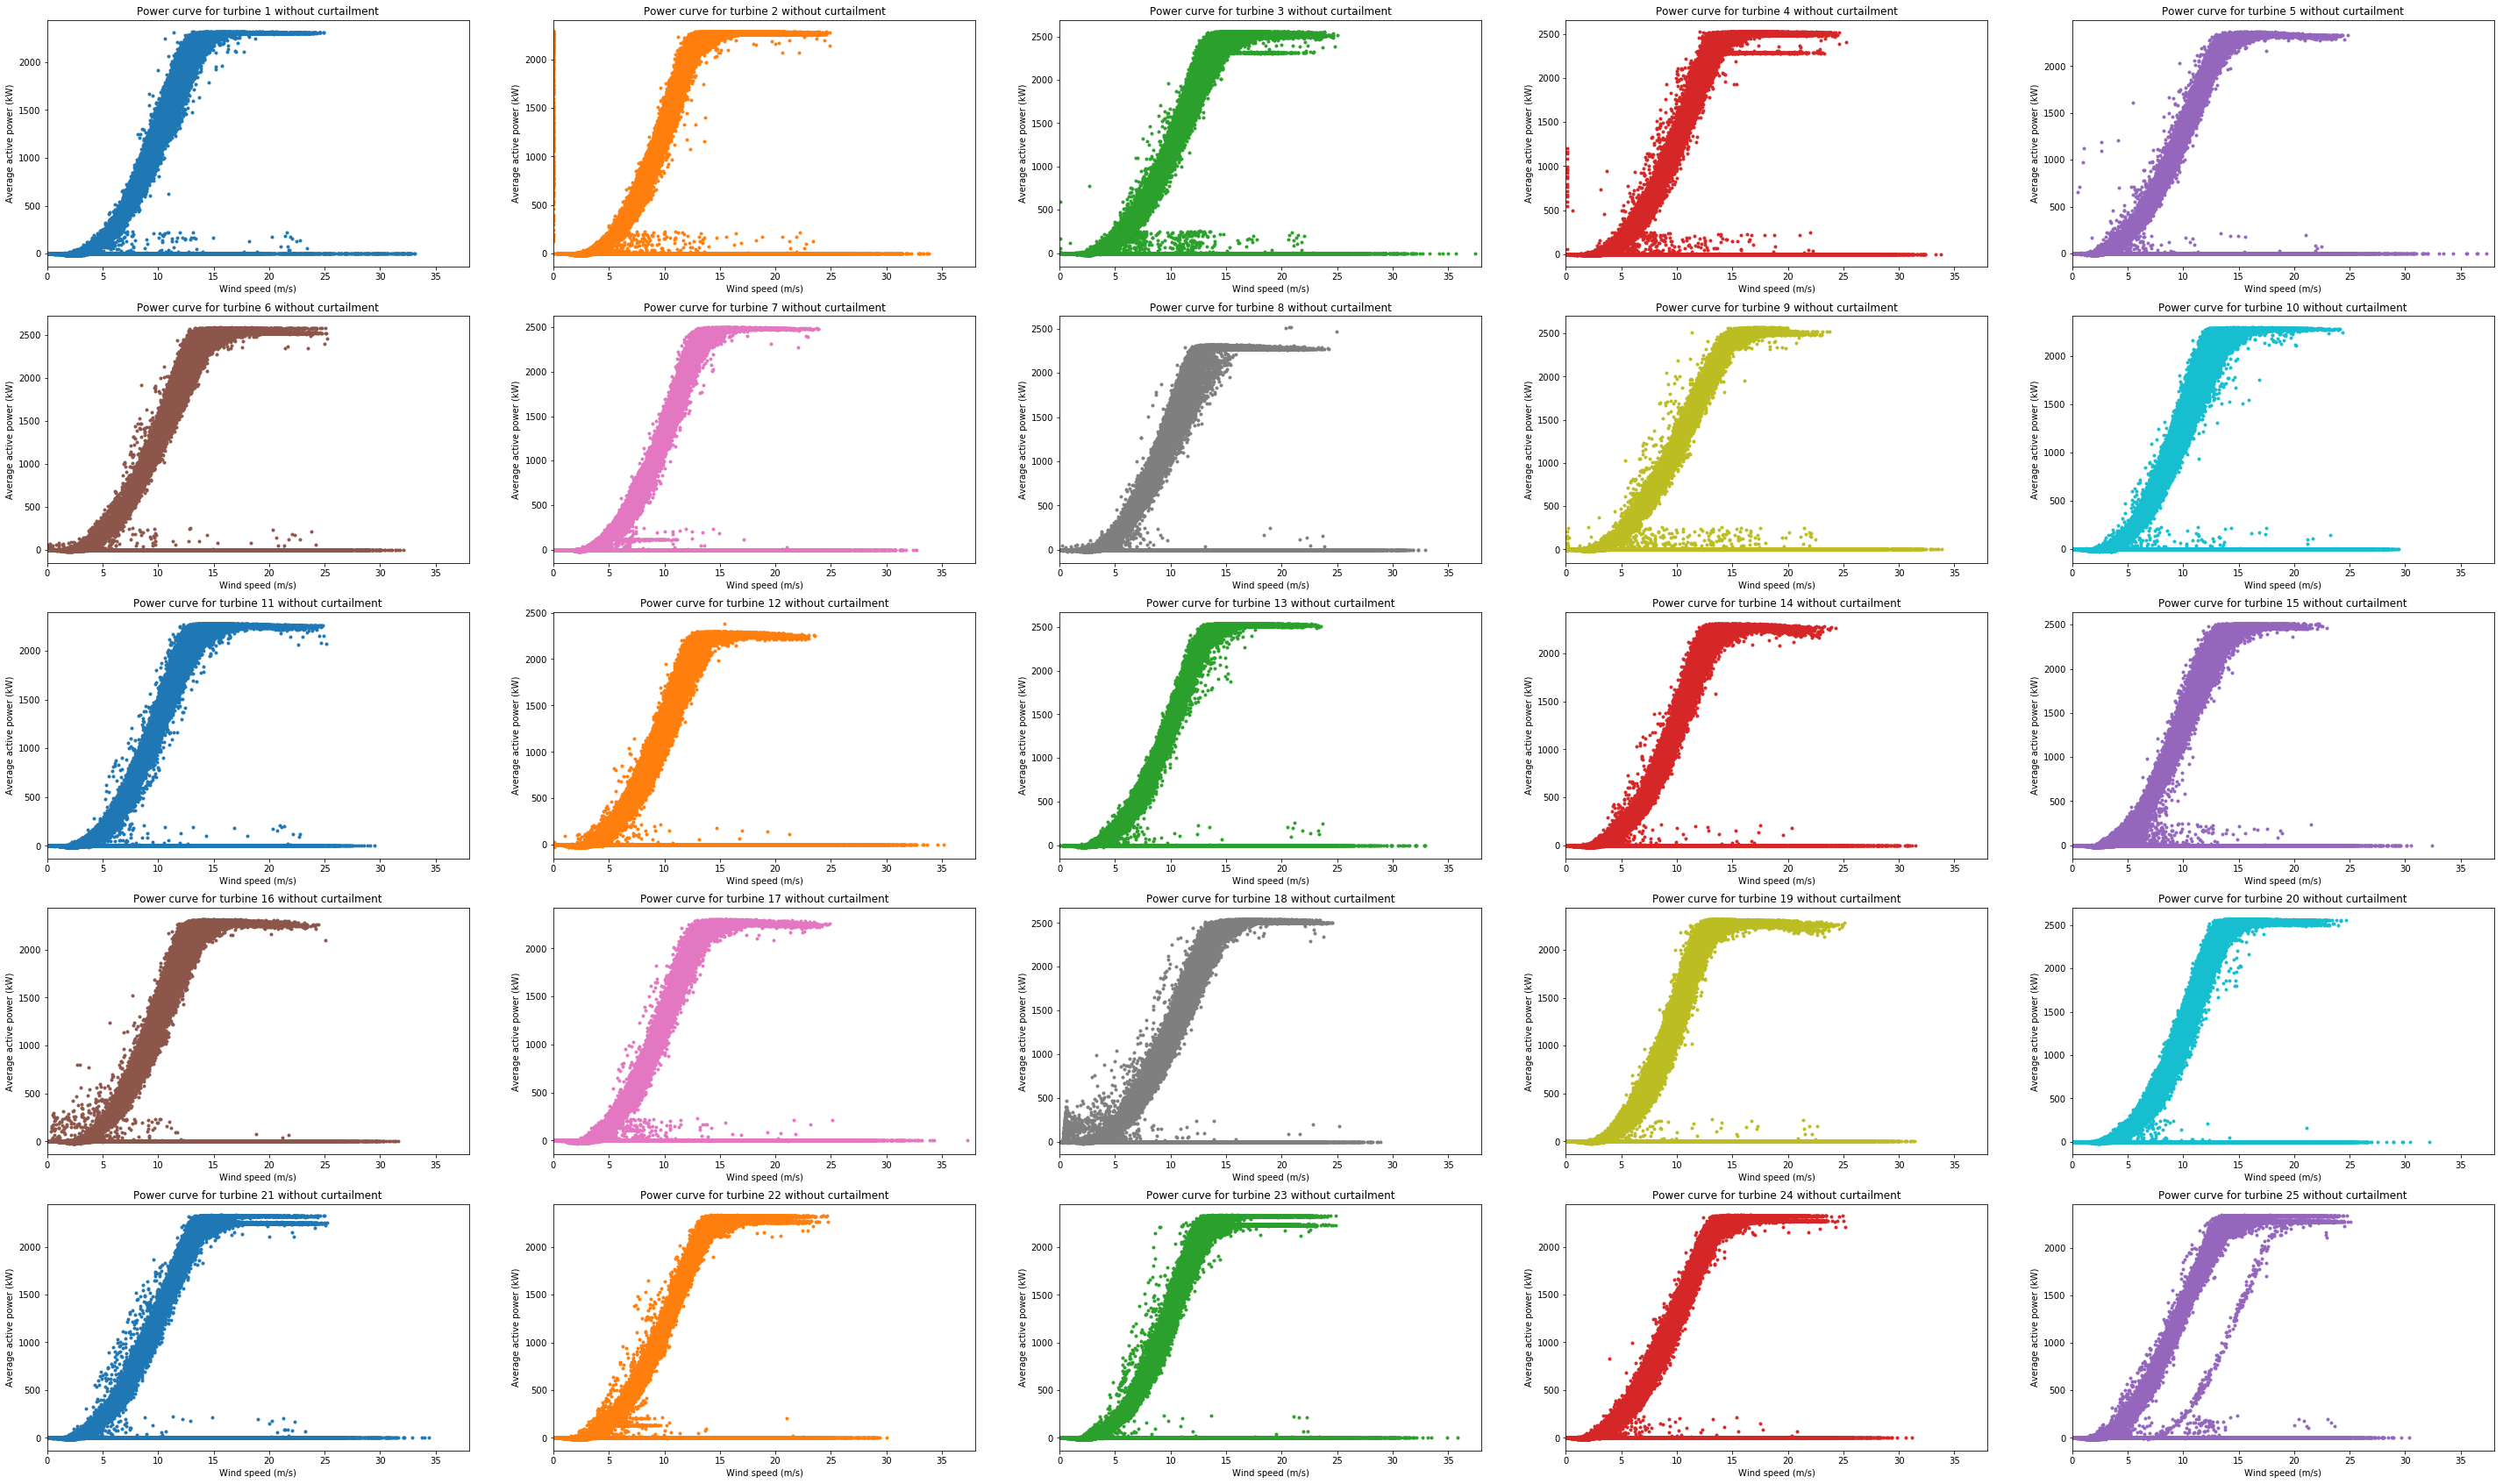

In [1]:
# plotting all columns (all turbines) in the same figure
ax = df2.plot(
    subplots=True, style='.', layout=(5, 5), figsize=(50, 30),
    sharex=False, title=list3, legend=False, xlim=(0, 38))
# based on layout=(x, y), create lists with range(0, x) and (0, y)
list4 = list(range(0, 5))
# get coordinates of each subplot
list5 = list(itertools.product(list4, list4))
for (x, y) in list5:
    ax[x][y].set_ylabel('Average active power (kW)')

In [ ]:
# frequency of pitch angles
# round pitch angle to nearest degree
df['pitch_round'] = df['pitch'].round()
dfg = pd.DataFrame(df.groupby('pitch_round').size())
dfg = dfg.sort_values([0], ascending=False)
# get percentage of frequency of pitch angle
dfg['pct'] = dfg[0] / dfg[0].sum() * 100

In [6]:
dfg

,0,pct
pitch_round,,
0.0,1860480,58.711186
70.0,276033,8.710776
87.0,168835,5.327928
1.0,113249,3.573800
90.0,80266,2.532955
2.0,54123,1.707960
91.0,53477,1.687574
92.0,36593,1.154766
3.0,34269,1.081427


In [ ]:
# finding power threshold before cut-in
# extract power readings before cut-in (3m/s)


def f_(c):
    if c['ws_av'] <= 3:
        return c['ap_av']


df['power'] = df.apply(f_, axis=1)

In [ ]:
# create pivot table (new dataframe)
p = pd.pivot_table(
    df, index=['ws_av'], columns=['turbine'], values=['power'])
# removing pivot table values name from heading
p.columns = p.columns.droplevel(0)
list6 = [
    'Power curve for turbine %s before cut-in' % x for x in list2]

In [ ]:
# rename index
p.index.name = 'Wind speed (m/s)'

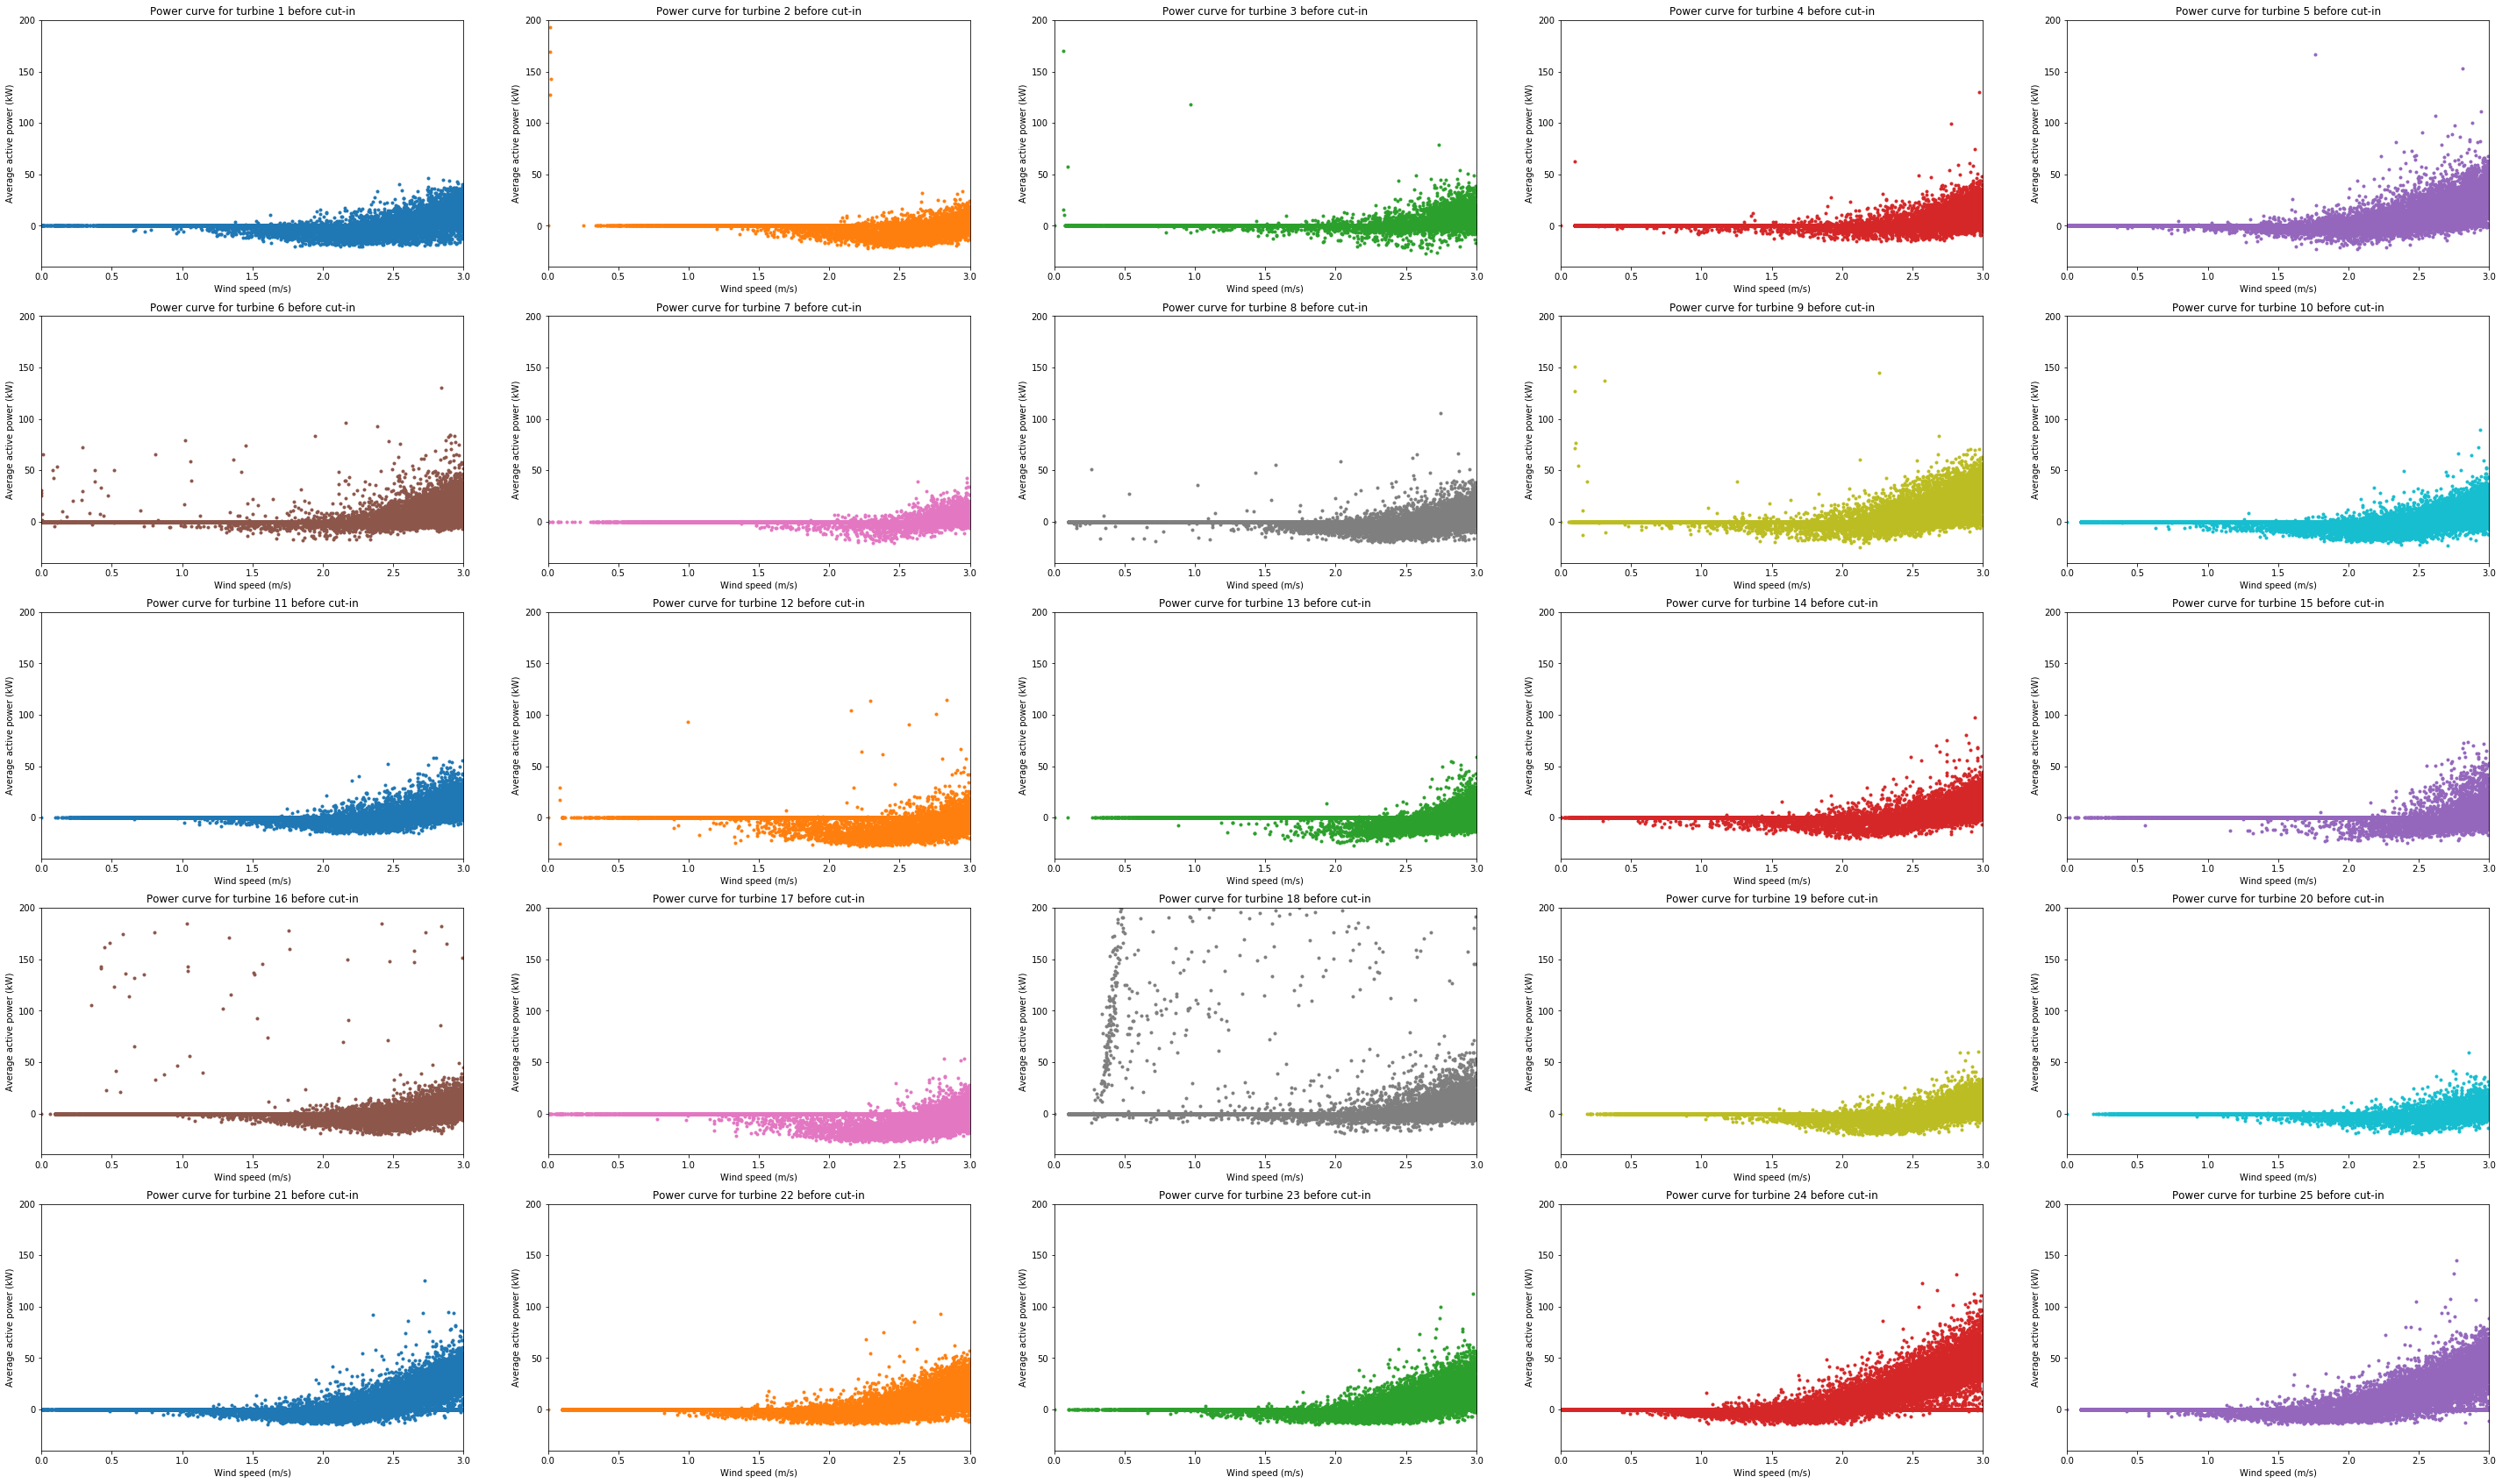

In [27]:
ax = p.plot(
    subplots=True, figsize=(50, 30), layout=(5, 5), style='.',
    sharex=False, title=list6, legend=False, xlim=(0, 3), ylim=(-40, 200))
for (x, y) in list5:
    ax[x][y].set_ylabel('Average active power (kW)')

In [ ]:
# plot for turbine 24 to visualise the difference
# list of turbines to plot
list1 = [24]

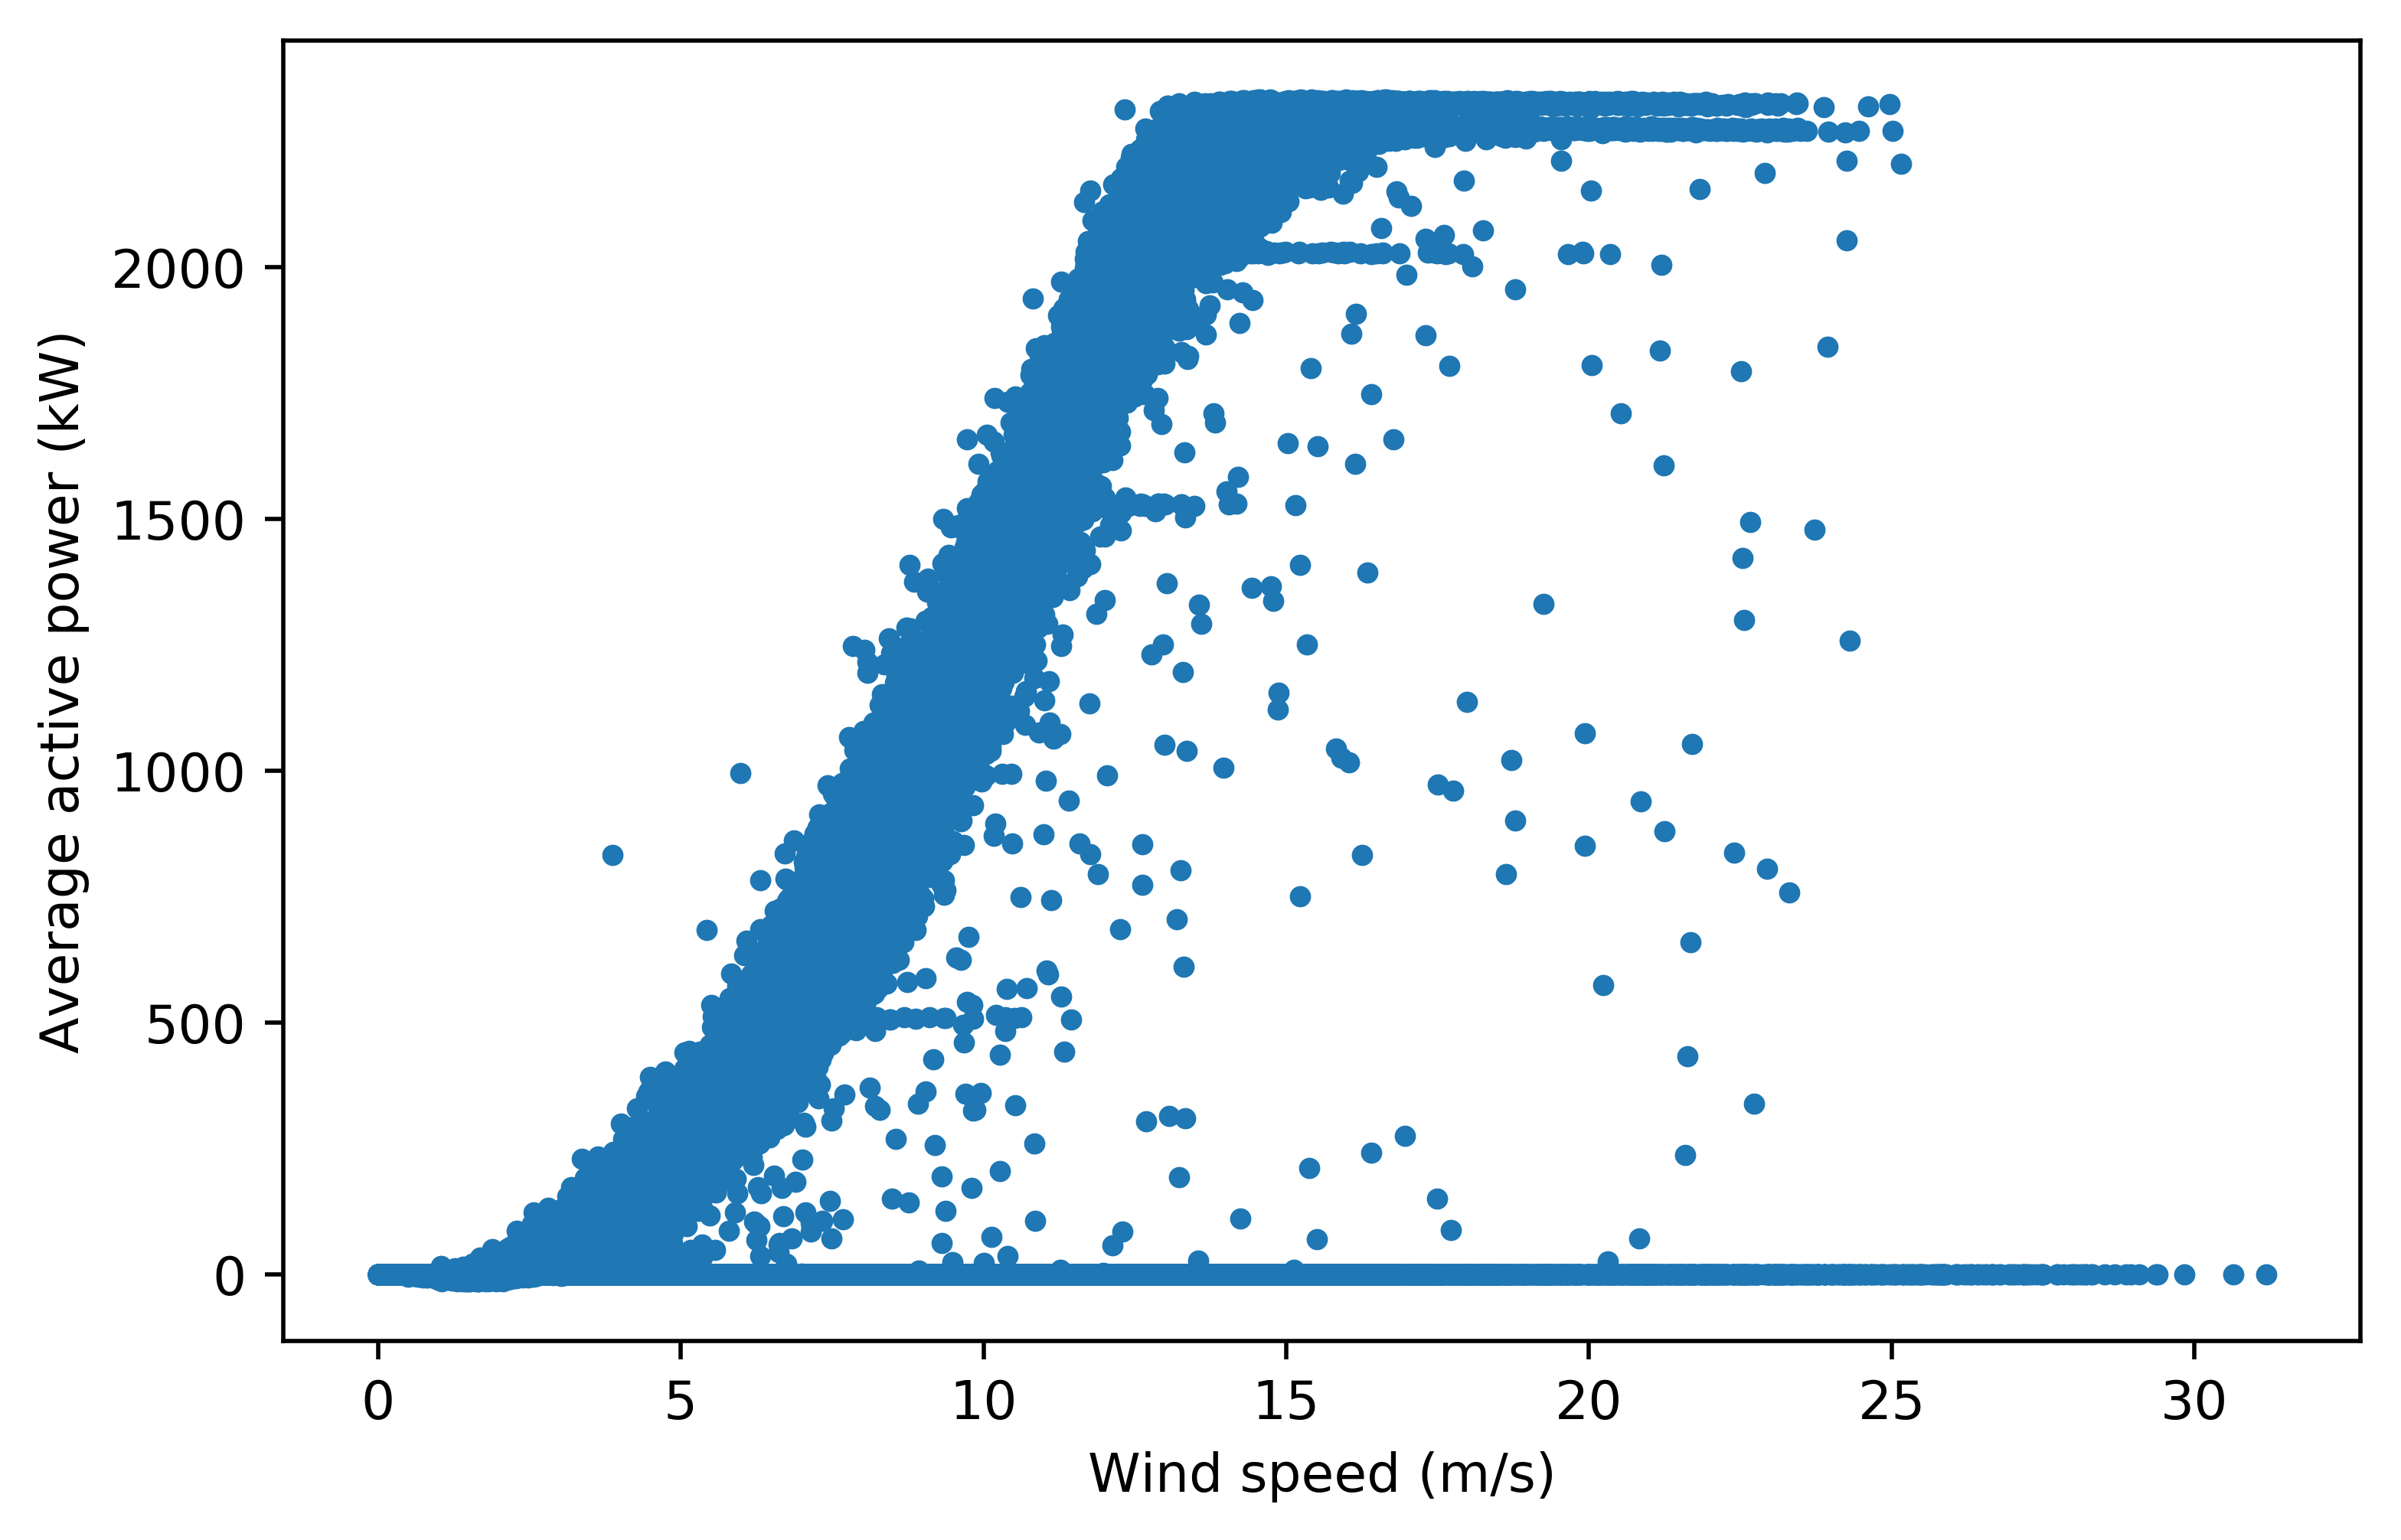

In [8]:
for x in list1:
    # filter only data for turbine x
    dfx = df[(df['turbine'] == x)].copy()

    # get x and y coordinates
    # normal w/ curtailment
    x1 = dfx['ws_av']
    y1 = dfx['ap_av']

    # plot the figure
    fig = plt.figure(figsize=(7, 4.5), dpi=500)

    ax1 = fig.add_subplot(111)
    ax1.scatter(x1, y1, marker='.', c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.show()

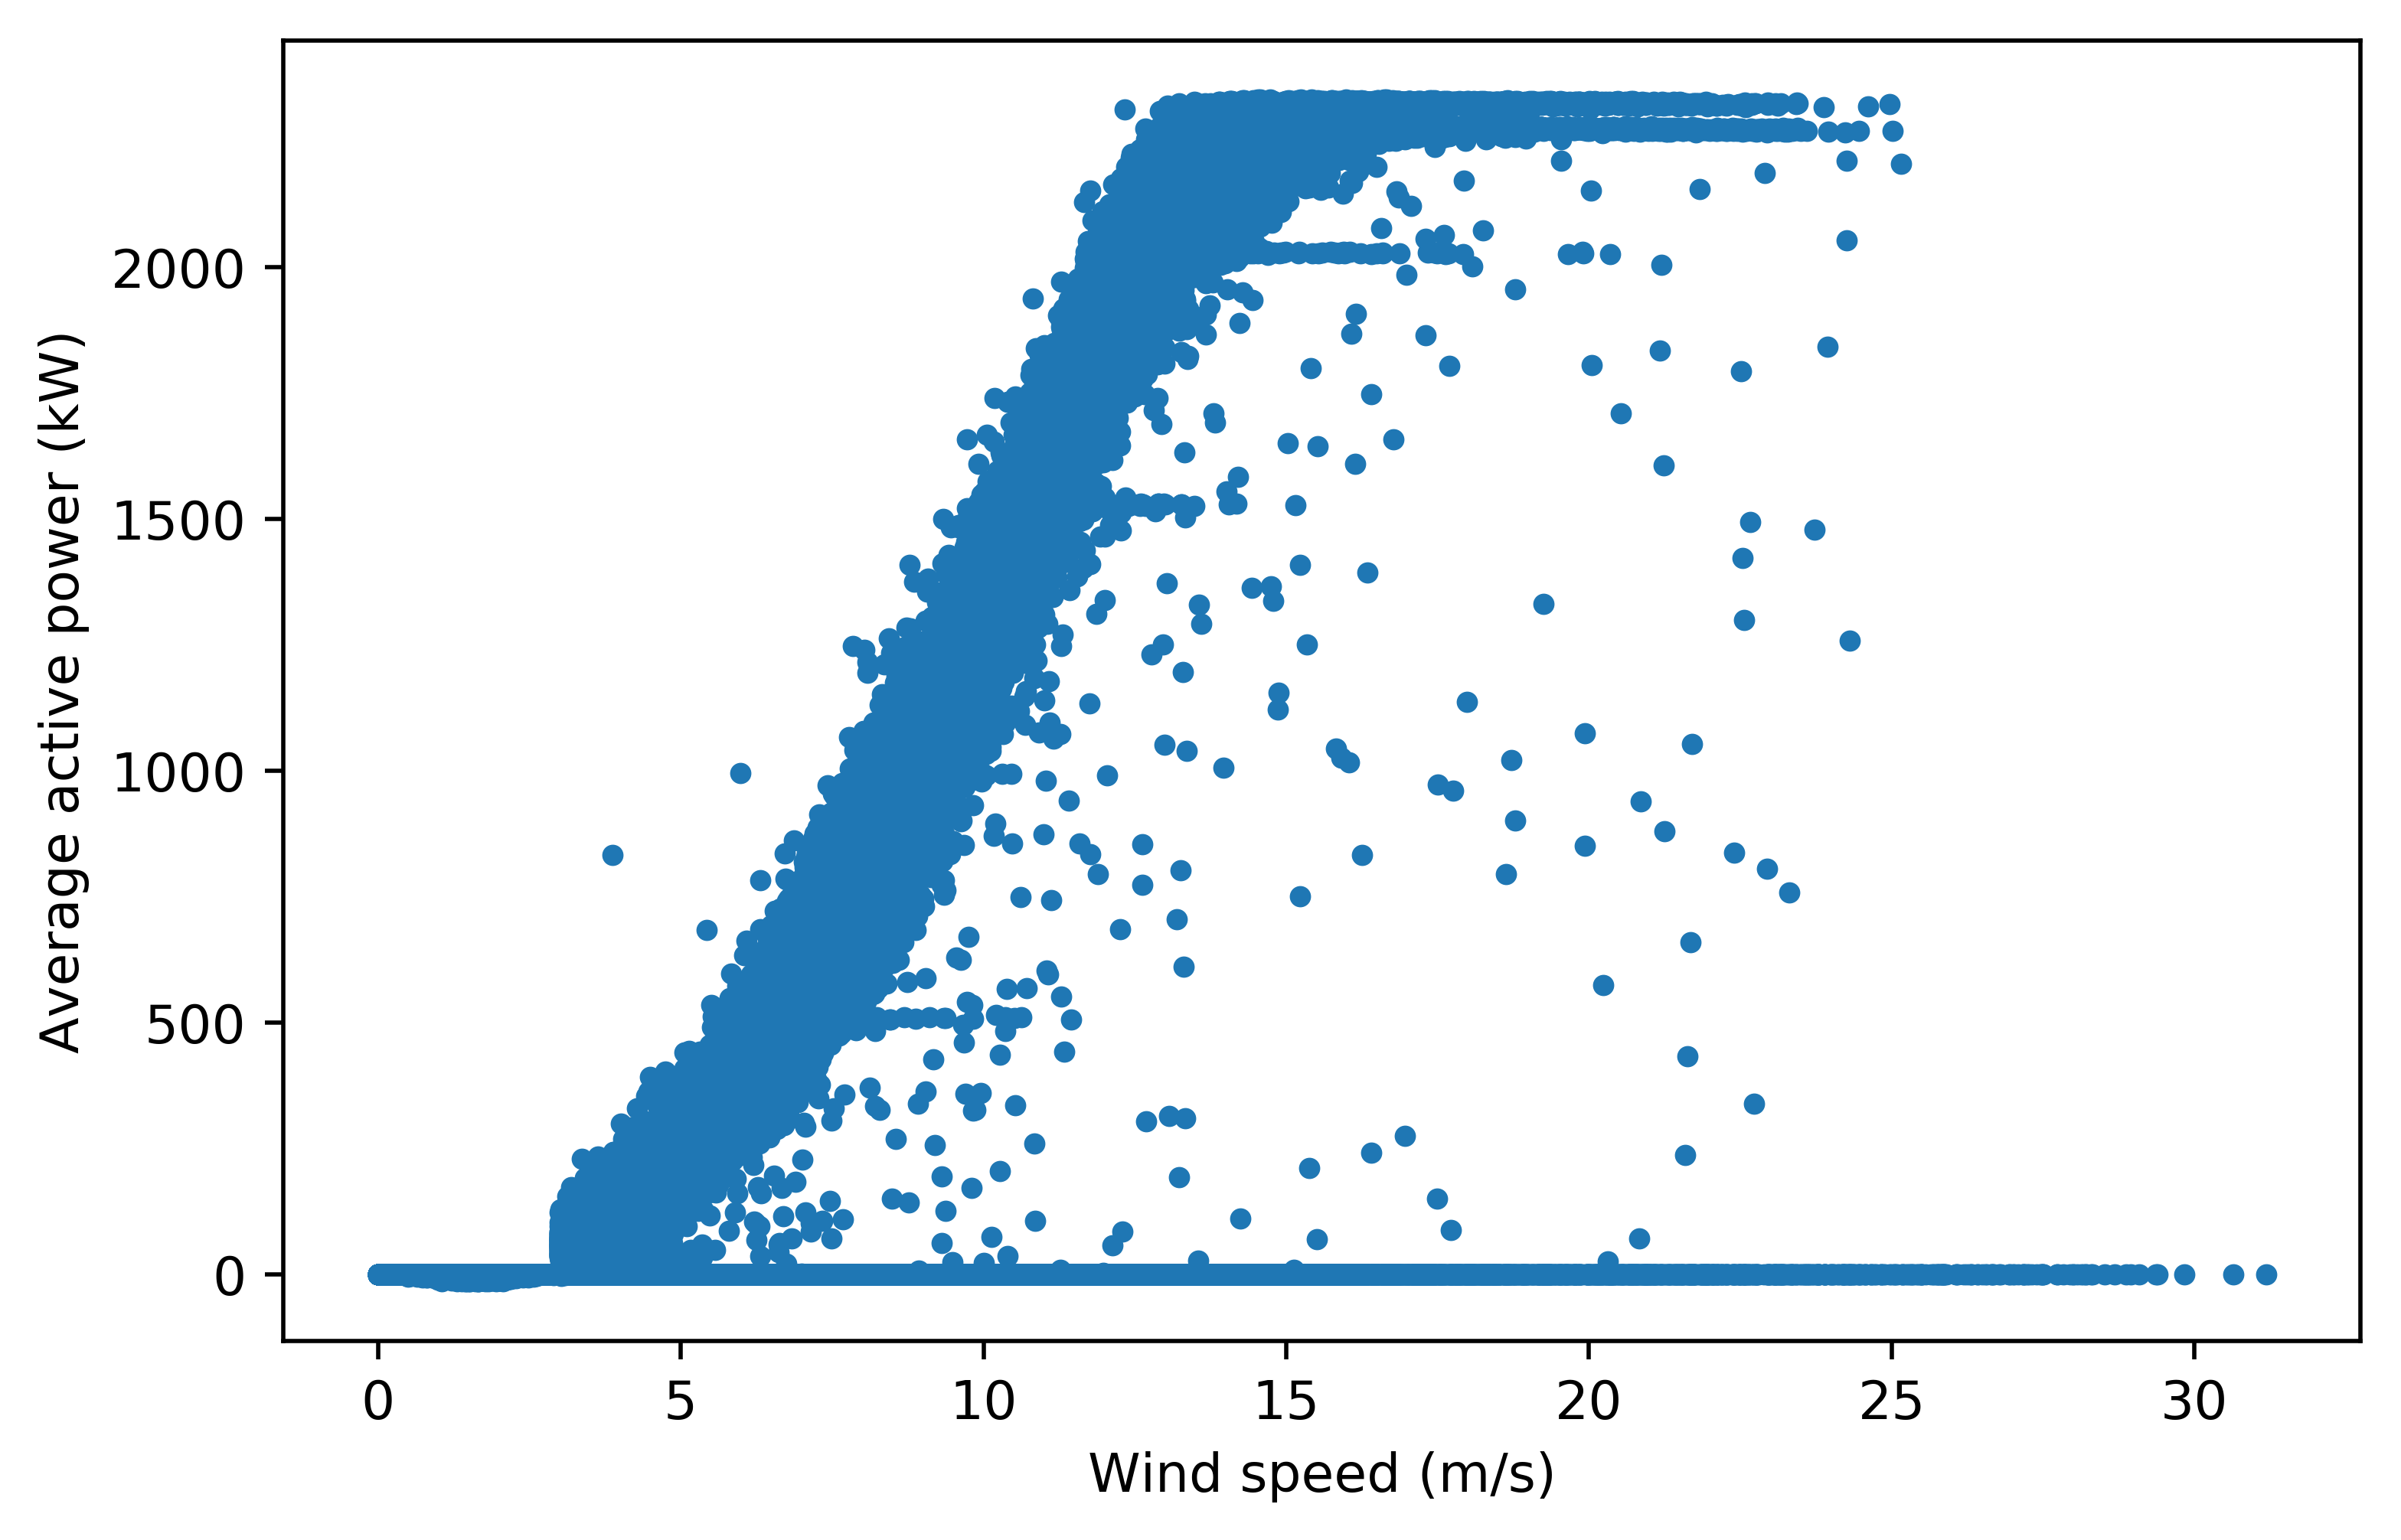

In [7]:
for x in list1:
    # filter only data for turbine x
    dfx = df[(df['turbine'] == x)].copy()

    def f_x(c):
        if c['ws_av'] < 3 and c['ap_av'] > 0:
            return 0
        else:
            return c['ap_av']

    dfx['ap'] = dfx.apply(f_x, axis=1)

    # get x and y coordinates
    # normal w/ curtailment
    x1 = dfx['ws_av']
    y1 = dfx['ap']

    # plot the figure
    fig = plt.figure(figsize=(7, 4.5), dpi=500)

    ax1 = fig.add_subplot(111)
    ax1.scatter(x1, y1, marker='.', c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.show()